In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import torch
import torch.nn as nn

class TextDetectionModel(nn.Module):
    def __init__(self):
        super(TextDetectionModel, self).__init__()
        # Define your model layers here
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        # Add other layers as per your model

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        # Forward pass through other layers
        return x


In [12]:
import torch

# Load the checkpoint
checkpoint = torch.load(model_path, map_location='cpu')

# Check the contents of the checkpoint
print(checkpoint.keys())


dict_keys(['date', 'version', 'license', 'docs', 'epoch', 'best_fitness', 'model', 'ema', 'updates', 'optimizer', 'train_args', 'train_metrics', 'train_results'])



0: 384x640 14 texts, 17.0ms
Speed: 2.9ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Class ID: 0.0, Confidence: 0.9024297595024109
Bounding Box: [     519.28      423.45      672.47      485.44]
Class ID: 0.0, Confidence: 0.8759390115737915
Bounding Box: [     260.05      491.08      428.31      556.88]
Class ID: 0.0, Confidence: 0.8727261424064636
Bounding Box: [     514.75      497.42      677.79      558.41]
Class ID: 0.0, Confidence: 0.8610372543334961
Bounding Box: [     236.38      15.082      488.06      101.67]
Class ID: 0.0, Confidence: 0.8525011539459229
Bounding Box: [     264.79      419.02      501.08      482.75]
Class ID: 0.0, Confidence: 0.8130356669425964
Bounding Box: [     551.09      163.96      676.29      222.05]
Class ID: 0.0, Confidence: 0.8085837960243225
Bounding Box: [     758.66      446.93      920.44      538.17]
Class ID: 0.0, Confidence: 0.7620362639427185
Bounding Box: [     373.54      344.03      549.31      40

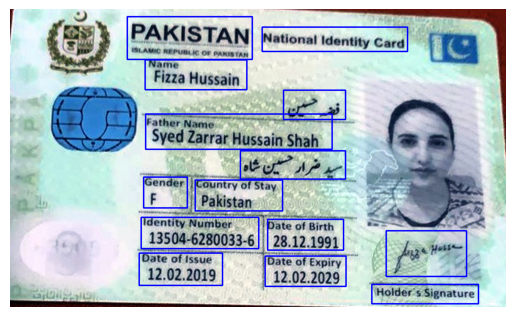

In [21]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the saved model weights
model_path = '/content/drive/MyDrive/Colab Notebooks/id_text_extraction/data_model/train5/weights/best.pt'
model = YOLO(model_path)

# Prepare the image for inference
def prepare_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)
        return image
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        return None

# Perform inference
def perform_inference(model, image_path):
    image = prepare_image(image_path)
    if image is not None:
        results = model(image)
        return results
    else:
        return None

# Process and visualize results
def process_results(results, image):
    if results is None:
        return image

    # Results are returned as a list of detections
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes in format [x1, y1, x2, y2]
        scores = result.boxes.conf.cpu().numpy()  # Confidence scores
        classes = result.boxes.cls.cpu().numpy()  # Class IDs

        # Print or process each detection
        for box, score, cls in zip(boxes, scores, classes):
            print(f"Class ID: {cls}, Confidence: {score}")
            print(f"Bounding Box: {box}")

            # Draw the bounding box on the image for visualization
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    return image

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Colab Notebooks/id_text_extraction/cnic/1.jpg'  # Update this path
image = prepare_image(image_path)
results = perform_inference(model, image_path)
if results:
    image_with_boxes = process_results(results, image)

    # Display the result
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No results to display.")



In [22]:
!apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,861 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-


0: 384x640 14 texts, 9.5ms
Speed: 3.1ms preprocess, 9.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)
Class ID: 0.0, Confidence: 0.9024297595024109
Bounding Box: [     519.28      423.45      672.47      485.44]
Class ID: 0.0, Confidence: 0.8759390115737915
Bounding Box: [     260.05      491.08      428.31      556.88]
Class ID: 0.0, Confidence: 0.8727261424064636
Bounding Box: [     514.75      497.42      677.79      558.41]
Class ID: 0.0, Confidence: 0.8610372543334961
Bounding Box: [     236.38      15.082      488.06      101.67]
Class ID: 0.0, Confidence: 0.8525011539459229
Bounding Box: [     264.79      419.02      501.08      482.75]
Class ID: 0.0, Confidence: 0.8130356669425964
Bounding Box: [     551.09      163.96      676.29      222.05]
Class ID: 0.0, Confidence: 0.8085837960243225
Bounding Box: [     758.66      446.93      920.44      538.17]
Class ID: 0.0, Confidence: 0.7620362639427185
Bounding Box: [     373.54      344.03      549.31      406.

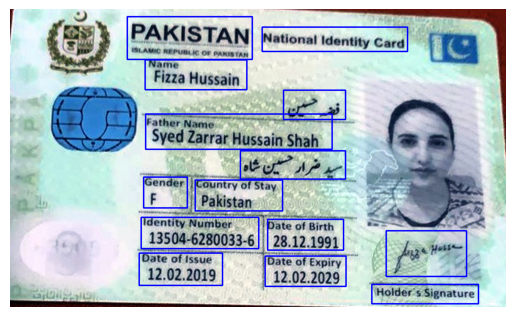

Extracted Texts:
Date of Birth

28.12.1991
Date of Issue

12.02.2019
Date of Expiry

12.02.2029
PAKISTAN

(ALAMIC REPUBLIC OF PAKISTAN
identity Number

13504-6280033-6

te
Country of Stay,
Pakistan
National Identity Card
EE ot De
Fizza Hussain
Oe AP
PY Wey siret genes fee ee
Father Name

Syed Zarrar Hussain Shah
Gender



In [23]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

# Path to the Tesseract executable (necessary for pytesseract to work properly)
# Update this path based on your system configuration
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Load the saved model weights
model_path = '/content/drive/MyDrive/Colab Notebooks/id_text_extraction/data_model/train5/weights/best.pt'
model = YOLO(model_path)

# Prepare the image for inference
def prepare_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB')
        image = np.array(image)
        return image
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        return None

# Perform inference
def perform_inference(model, image_path):
    image = prepare_image(image_path)
    if image is not None:
        results = model(image)
        return results
    else:
        return None

# Process results and extract text
def process_results(results, image):
    if results is None:
        return image, []

    extracted_text = []
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes in format [x1, y1, x2, y2]
        scores = result.boxes.conf.cpu().numpy()  # Confidence scores
        classes = result.boxes.cls.cpu().numpy()  # Class IDs

        for box, score, cls in zip(boxes, scores, classes):
            print(f"Class ID: {cls}, Confidence: {score}")
            print(f"Bounding Box: {box}")

            x1, y1, x2, y2 = map(int, box)

            # Crop the detected region
            cropped_image = image[y1:y2, x1:x2]
            # Convert cropped image to PIL Image for OCR
            pil_image = Image.fromarray(cropped_image)

            # Use Tesseract to extract text
            text = pytesseract.image_to_string(pil_image)
            extracted_text.append(text)

            # Draw the bounding box on the image for visualization
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    return image, extracted_text

# Path to the image you want to test
image_path = '/content/drive/MyDrive/Colab Notebooks/id_text_extraction/cnic/1.jpg'  # Update this path
image = prepare_image(image_path)
results = perform_inference(model, image_path)
if results:
    image_with_boxes, texts = process_results(results, image)

    # Display the result
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print extracted text
    print("Extracted Texts:")
    for text in texts:
        print(text.strip())
else:
    print("No results to display.")
